## Analyzing IMDb Reviews

In this code demonstration,
- We will do some **text preprocessing steps**.
- Then, we will create features using **Bag of Words model** and **TF-IDF model**.
- Finally, we will build the **logistic regression model**.

## Session: Text Analytics I

# 1. Import libraries

To start off, you will import the required libraries for visualising and analysing the text data.


In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk


import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DELL
[nltk_data]     5590\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. Load the data

Load the data using either of the below methods

##### Method 1 - Google Colab
- Run the code block below if you're using Google colab for this comprehension and have uploaded the IMDB_reviews.csv file in your Google Drive
- Else, skip this part and move to the next cell block and run it in case you're using Jupyter 

In [4]:
## Load data
df = pd.read_csv('IMDB_reviews.csv')

In [5]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


### **Question 1:**  *After importing the required packages and library. You have loaded the dataset into a DataFrame. What is the shape of the dataset?*

In [6]:
# write your code here
df.shape

(50000, 2)

---

For ease of computation, we shall only use 10000 rows for our analysis

In [7]:
# Let's take only first 10000 rows for the rest of the analysis for the ease of computation
imdb = df.head(10000).copy()

In [8]:
imdb

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
9995,fun entertaining movie about wwii german spy j...,positive
9996,give me a break how can anyone say that this i...,negative
9997,this movie is a bad movie but after watching a...,negative
9998,this is a movie that was probably made to ente...,negative


# 3. Removing stopwords and tokenization

In [9]:
from nltk.corpus import stopwords

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

### Questions 2,3,4 are to be answered with the code block given below. Check the corresponding comments

- ##### **Question 2:**  You have a function remove_stopwords that  does tokenization and stopword removal of any given text. 

***You have the code written for tokenizing the text using word_tokenize. As an additional pre-processing step, you want to remove any white spaces occurring before or after each token of tokenized text. Which of the following code does it?***

   - Hint: You can check this link:https://www.w3schools.com/python/ref_string_strip.asp for removing white spaces in a string.

- ##### **Question 3:** *You have already saved the English stopwords in a list named ‘stopwords_list’. Which of the following code best fits the missing code in the removing stopwords from the tokenized text ?*



- ##### **Question 4:** *What does the statement return filtered_text of the function  remove_stopwords return?*



In [25]:
a = [token.strip() for token in word_tokenize(imdb['review'][678])]

In [29]:
len(' '.join([x for x in a if x in stopword_list]))

1258

In [35]:
###Code Block for Question 2,3,4


from nltk.tokenize import word_tokenize,sent_tokenize

#You can either remove stopwords before or after stemming.
#But since this is a review context, we expect users to have used many different words 
#And we did stemming before filtering for stopwords.

#Removing the stopwords. This function takes the value of a single review text as an argument. 
#Tokenize the text, remove the stopwords and return the cleaned review text
def remove_stopwords(text):
    tokens =  word_tokenize(text)##Tokenize the text 

    #########(Question 2)############
    ##Strip any extra spaces in each word of the list tokens
    tokens = [token.strip() for token in tokens]

    #########(Question 3)############
    #Removing stop words from the tokens and creating a list containing only non-stopword tokens
    # Logic - convert each token in tokens to lowercase and check if it is a stopword.
    #If it is not a stopword, then add it to the filtered_tokens list
    
    filtered_tokens=[]
    for token in tokens:
        ## write your if condition statement here to filter stop_words:
        if token.lower() not in stopword_list:
            filtered_tokens.append(token)

    # Individual tokens(words) are joined with whitespace as a separator to create a complete sentence
    filtered_text = ' '.join(filtered_tokens)

    #########(Question 4)############ 
    return filtered_text


To check if you have written the function ***remove_stopwords*** correctly, you can run the above function on a sample review and view the results

In [36]:
## Example
len(imdb['review'][678]

2942

The original length of this review is 4202. After tokenization and stopword removal it should become 2942

In [37]:
##Running the following code to verify
##Make sure the function remove_stopwords has been correctly written above

In [40]:
remove_stopwords(imdb['review'][678])

'adenoid hynkel lowly soldier world war one rises subsequent years become ruthless dictator toumania creates aggressive antisemitic war machine cultivates little toothbrush moustache sound like anyone knowfrom safety hollywood chaplin uses soapbox exhort europe take arms defy hitler mussolini given united states 1940 year neutrality ahead strong desire embroil europes civil strife remember hitler declared war usa way round surprising chaplin allowed distribute immoderate polemicthe story involves one hand vulgar repellant hynkel reign terror ineptly presides life jewish ghetto every single person friendly humane brave etc etc chaplin hynkel also plays jewish barber little hero ghetto tramp name needless say chaplin writes directs stars composes music cateringin 1940 full truth yet known third reich chaplin forgiven something less perfect historical foresight even standards day gets hitler badly wrong comedian sentimentalist chaplin tries ridicule hitler making hynkel silly hapless huma

Once you have verified that the above function is working correctly, run the following code to ensure that the function is applied on all the reviews in the imdb DataFrame

In [34]:
#Apply function on review column. Removing stopwords from each review in the dataframe
imdb['review']=imdb['review'].apply(remove_stopwords)

In [39]:
imdb['review']

0       one reviewers mentioned watching 1 oz episode ...
1       wonderful little production filming technique ...
2       thought wonderful way spend time hot summer we...
3       basically theres family little boy jake thinks...
4       petter matteis love time money visually stunni...
                              ...                        
9995    fun entertaining movie wwii german spy julie a...
9996    give break anyone say good hockey movie know m...
9997    movie bad movie watching endless series bad ho...
9998    movie probably made entertain middle school ea...
9999    smashing film filmmaking shows intense strange...
Name: review, Length: 10000, dtype: object

# Stemming

- Stemming is rule-based, it omits the last few letters like 'ing', 'ed', 'es' and more. It is fast but may create strange words.
- Lemmatizing is dictionary-based, where it translates all words to the root form, like 'went' to 'go', 'going' to 'go' and more. 
Generally we prefer lemmatizing, but it might take some time in large datasets. 
- For the ease of computation we will use stemming in this analysis

### **Question 5:** Now that you have finished writing your stopwords removal function, the next step is to do stemming/lemmatization. Next, we will define a function named ***simple_stemmer*** which uses PorterStemmer to stem any review text passed to it as an argument. 

### Fill in the missing code for the simple_stemmer to work correctly

In [41]:
#Import the necessary libraries
from nltk.stem import PorterStemmer

def simple_stemmer(text):

#########(Question 5)############ 
    porter=PorterStemmer()
    stemmed_words = []
    for word in word_tokenize(text):
        stem_word = porter.stem(word)
        stemmed_words.append(stem_word)     
    return ' '.join(stemmed_words)

In [72]:
porter=PorterStemmer()

In [76]:
porter.stem('sweeping')

'sweep'

To check if you have written the function ***simple_stemmer*** correctly, you can run the above function on sample review and view the results

In [42]:
##Example
len(imdb['review'][456])

2509

The original length of this review is 2509. After stemming it should become 2225

In [43]:
##Running the following code to verify
##Make sure the function simple_stemmer has been correctly written above

In [44]:
len(simple_stemmer(imdb['review'][456]))

2225

Once you have verified that the above function is working correctly, run the following code to ensure that the function is applied on all the reviews in the imdb DataFrame

In [45]:
# Applying stemming to all reviews in the dataframe column 'review'
imdb['review'] = imdb['review'].apply(simple_stemmer)

In [46]:
#Example of randomly selected review text from the dataframe after stemming
imdb['review'][456]

'oh good would never thought possibl see thriller wors domest disturb soon arm rotten plot terribl edit stilt act headacheinduc style sorri word sanctimoni kind movi almost forc reevalu entir genr film bad even thriller condemn complet failur seem littl betternow sanctimoni terribl film also succe difficult task rip better movi pathet job right main titl noth blatant attempt reproduc one se7en impress someth didnt smell quit right soon movi start seri corni wannab hip quickcut full gori imag bombast color knew smell come fromit turn two policemen rather policeman jim renart michael par policewoman dorothi smith jennif rubin investig murder spree vancouv serial killer known monkey killer menac chill nicknam uh work method kill quit lot peopl see nut appar work follow proverb see evil hear evil speak evil cut eye ear tongu victim far six eye six ear three tongu ingeni fashion renart smith figur monkey killer probabl go kill three peopl well probabl want complet number 666 suddenli film f

This concludes the assessments for the first part of the comprehension.
You can continue working on the next set of assessments after you have completed the Document Clustering session

## Session: Document Clustering 

In the in-module demonstration, you saw an example, where you performed clustering on text data

You can also peform other types of machine learning models on text data as well. **In this assessment, you shall be building a logistic  regression model on text data to predict sentiment of the review**

This is a guided assessment to teach you additional concepts on top of the given in-module content

### Step - 1 Data Preprocessing

#### 1.1 - Converting the labels to 1 and 0

Run the following cells to perform the necessary data preprocessing

In [47]:
imdb.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In the next step we shall convert the reviews from positive/negative to 1,0

In [48]:
#Labelling the sentiment data.

#Label Binarizer converts Categorical data and outputs into a Numpy array of 0s and 1s. Label Binarizer is used to encode column data.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html


from sklearn.preprocessing import LabelBinarizer

lb=LabelBinarizer()

#Transformed sentiment data
imdb['sentiment']=lb.fit_transform(imdb['sentiment'])

In [49]:
### Now positive sentiment will be encoded as 1 and negative would be encoded as 0

In [50]:
### Check the DataFrame again
imdb.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


#### Question 1 - How many reviews have a positive sentiment in the imdb DataFrame?

In [53]:
### Write the code to find the number of positive sentiment reviews
positive_sentiment = imdb[imdb['sentiment'] == 1]

In [54]:
positive_sentiment.shape

(5028, 2)

#### 1.2 Create a Tf-Idf object and fit the reviews

Next we have to convert the data to a tf-idf object.

#### Question 2 - Write the code to import the necessary libraries and create a TF-IDF vectorizer object with all the default hyperparameters

In [58]:
###Write the code for importing the necessary methods and create a TF-IDF vectorizer object
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tfidf_vectorizer = TfidfVectorizer()

Run the rest of the cells to convert the imdb to a tf_idf object

In [60]:
#Normalize the reviews for fitting the tf-idf model
norm_reviews=imdb.review

In [61]:
## Fit the tfidf_vectorizer
tv_fit = tfidf_vectorizer.fit(norm_reviews)

#### 1.3 Train-Test Split

Run the following cells to perform a train-test split

In [62]:
## Split the data into training and train sets
from sklearn.model_selection import train_test_split
X_tv_fit_train, X_tv_fit_test, y_train, y_test = train_test_split(norm_reviews, imdb['sentiment'], test_size = 0.2, random_state = 1)

In [63]:
# Normalizing train reviews with tfidf model
X_tv_fit_train = tv_fit.transform(X_tv_fit_train)

In [64]:
#Normalised test reviews with tfidf model
X_tv_fit_test = tv_fit.transform(X_tv_fit_test)

In [65]:
print(X_tv_fit_train.shape)
print(X_tv_fit_test.shape)

(8000, 62938)
(2000, 62938)


In [66]:
##You can also check the array to which they have been transformed to
X_tv_fit_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Step 2 - Modeling Building and Evaluation

In [67]:
# Build the logistic regression model for the data
from sklearn.linear_model import LogisticRegression

#Training the model
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C=1, random_state=42).fit(X_tv_fit_train, y_train)

#### Question 3 - Fill in the missing code to compare the predictions for the test data with the actual label and calculate the validation accuracy

In [71]:
## Model Evaluation
from sklearn.metrics import accuracy_score

# Predictions at threshold = 0.5
y_pred = lr.predict(X_tv_fit_test)

print('Validation set Accuracy: %.3f' % accuracy_score( y_pred, y_test))

Validation set Accuracy: 0.881


# Additional Reading - Building Logistic Regression Model using Bag of Words Model

This is an additional reading for your understanding of how to implement a logistic regresssion model on top of bag of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating a matrix with reviews in row and unique words as columns and frequency of word in review as values.
#Count vectorizer for bag of words
cv=CountVectorizer()

#Fitting model on entire data
cv_fit = cv.fit(norm_reviews)

### Transform the train and the test dataset separately

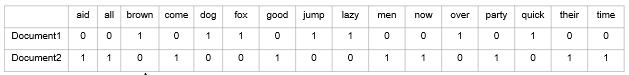

In [ ]:
#Calculating sentiment count. imdb['sentiment'] now has the cleaned review text
imdb['sentiment'].value_counts()

In [ ]:
# Split the data into training and train sets
from sklearn.model_selection import train_test_split
X_cv_fit_train, X_cv_fit_test, y_train, y_test = train_test_split(norm_reviews, imdb['sentiment'], test_size = 0.3, random_state = 1)

In [ ]:
# Normalizing train reviews with bag of words model
X_cv_fit_train = cv_fit.transform(X_cv_fit_train)

#Normalised test reviews with bag of words model
X_cv_fit_test = cv_fit.transform(X_cv_fit_test)

In [ ]:
print(X_cv_fit_train.shape)
print(X_cv_fit_test.shape)

In [ ]:
# Build the logistic regression model for the data
from sklearn.linear_model import LogisticRegression

#Training the model
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C=1, random_state=42).fit(X_cv_fit_train, y_train)


#Fitting the model for tf-idf features
lr_bow=lr.fit(X_cv_fit_train,y_train)
print(lr_bow)

In [ ]:
y_pred_bow = lr_bow.predict(X_cv_fit_test)

In [ ]:
#Classification report for bag of words 
from sklearn.metrics import classification_report
lr_bow_report=classification_report(y_test, y_pred_bow,target_names=['Positive','Negative'])
print(lr_bow_report)